In [2]:
## Ammonia molecule 28 / 08 / 2022

In [3]:
import matplotlib.pyplot as plt
import numpy as np
from numpy import linalg as la

In [4]:
def delta(i,j):
  return 1 if i==j else 0

def H(i,j,U):
  return -(delta(i+1,j)+delta(i-1,j)-2*delta(i,j))/d**2 +U[i]*delta(i,j)

In [5]:
#hamiltonian matrix
def Hamilton(U):
  Ham=np.zeros((N,N))
  for i in range(0,N):
    for j in range(0,N):
      Ham[i,j]=H(i,j,U)
  Ham[-1,0]=-1/d**2
  Ham[0,-1]=-1/d**2
  Hvalue,Hvector=la.eig(Ham) # calculate eigenvalues and eigen vectors
  SortIndex=Hvalue.argsort() # get a list of index for the sorted eigen value list : we sort it so that we get the successive energy states
  Hvalue=Hvalue[SortIndex] #sort eigenvalue list/array 1D
  Hvector= Hvector[:,SortIndex] # sort the eigen vectors 1D arrays according to eigen values, and store columnwise
  return Hvalue,Hvector

def Hamiltonli(U):
  Ham=np.zeros((N,N))
  for i in range(0,N):
    for j in range(0,N):
      Ham[i,j]=H(i,j,U)
  Hvalue,Hvector=la.eig(Ham) # calculate eigenvalues and eigen vectors
  SortIndex=Hvalue.argsort() # get a list of index for the sorted eigen value list : we sort it so that we get the successive energy states
  Hvalue=Hvalue[SortIndex] #sort eigenvalue list/array 1D
  Hvector= Hvector[:,SortIndex] # sort the eigen vectors 1D arrays according to eigen values, and store columnwise
  return Hvalue,Hvector


## Ammonia Molecule

$V(x)=a(\frac{x^2-b^2}{b^2})^2$

Dimensionless Schrodinger's equation:
$$-\frac{d^2\phi}{dy^2}+K(y^2-1)^2=ϵ\phi$$
here, $K=\frac{2m}{ħ^2}ab^2$


In [6]:
L=2.
N=700
d=(2*L+1)/N
d

yl=np.linspace(-L,L,N)

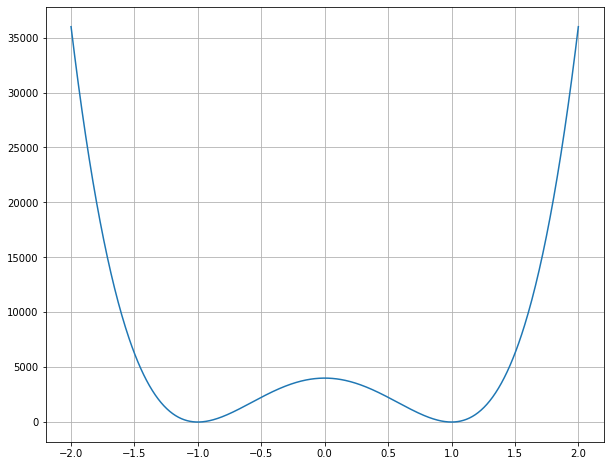

In [7]:
k=4000 #a*2m/h**2

def U(yl,b):
  K=k*(b**2)
  Us=[K*((i**2)-1)**2 for i in yl]
  Us=np.array(Us)
  return Us

#print(Us)
plt.figure(figsize=(10,8))
plt.plot(yl,U(yl,1))
plt.grid()
#plt.ylim(0,200)

In [8]:
b=3
Ua=U(yl,b)
Hvalue,Hvector=Hamilton(Ua)

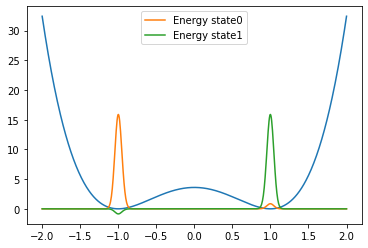

In [9]:
plt.plot(yl,0.0001*Ua)
for j in range(2):
  plt.plot(yl,60*Hvector[:,j],label=f"Energy state{j}")
plt.legend()

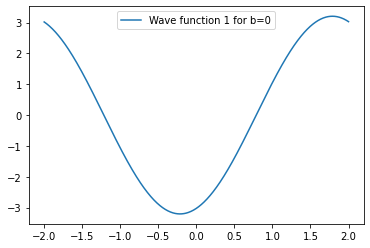

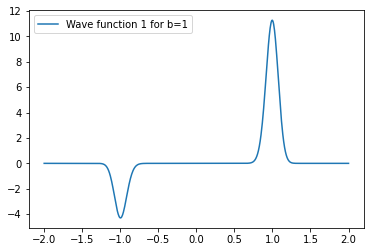

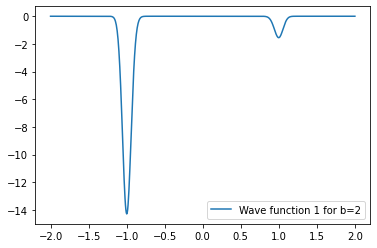

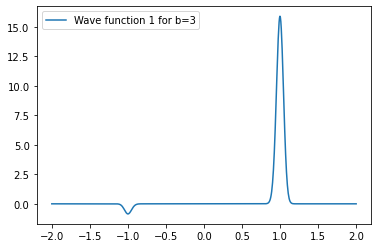

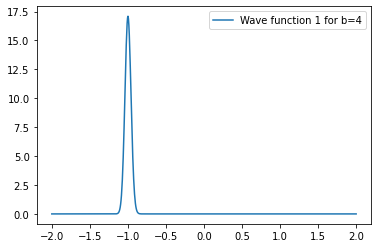

In [10]:
for b in range(5):
  Ua=U(yl,b)
  Hvalue,Hvector=Hamilton(Ua)
  #plt.plot(yl,0.0001*Ua)
  for j in range(1,2):
    plt.plot(yl,60*Hvector[:,j],label=f"Wave function {j} for b={b}")
    plt.legend()
    plt.show()
